# Ćwiczenie 11. Filtracja górnoprzepustowa

Biblioteki używane dla wykonania tego ćwiczenia:

In [8]:
import cv2
import matplotlib.pyplot as plt

### a) Filtry Sobela

Dla realizacji zadania detekcji krawędzi wykorzystano operator Sobela, który należy do grupy masek gradientowych. Polega on na przybliżeniu pochodnych kierunkowych obrazu – w poziomie (X) i pionie (Y) – w celu uwidocznienia miejsc o największych zmianach jasności, czyli krawędzi.

W kodzie zastosowano gotowe funkcje z biblioteki `cv2`, które automatycznie wykonują konwolucję obrazu z odpowiednimi maskami Sobela. Dodatkowo obliczono również kombinację obu kierunków (X i Y), aby uzyskać informacje o krawędziach ukośnych.

Metoda Sobela wzmacnia krawędzie i tłumi szumy, dzięki czemu nadaje się do podstawowej analizy struktury obrazu.


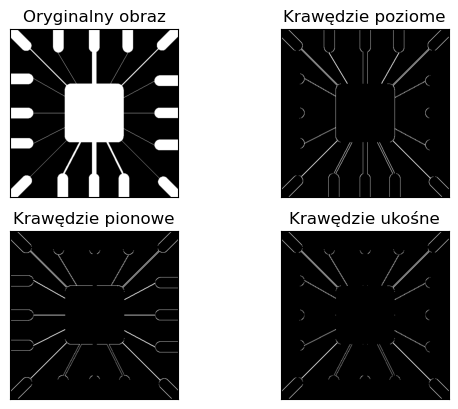

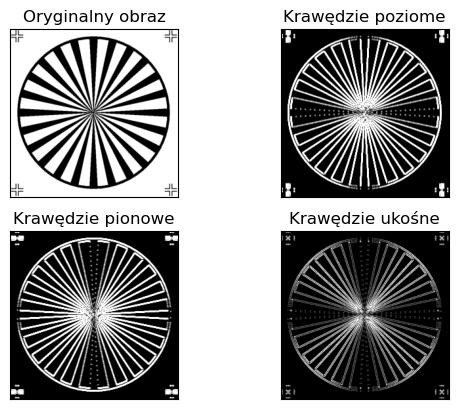

In [9]:
def sobel_edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Filtry Sobela
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Krawędzie poziome
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Krawędzie pionowe
    sobel_xy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3) # Krawędzie ukośne
    
    # Konwersja wyników do 8-bitowej skali szarości
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    sobel_xy = cv2.convertScaleAbs(sobel_xy)
    
    # Wyświetlenie wyników
    titles = ['Oryginalny obraz', 'Krawędzie poziome', 'Krawędzie pionowe', 'Krawędzie ukośne']
    images = [img, sobel_x, sobel_y, sobel_xy]
    
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()

# Przykładowe użycie:
sobel_edge_detection('ObrazyTestowe/circuitmask.tif')
sobel_edge_detection('ObrazyTestowe/testpat1.png')

### b) Działanie Laplasjanu do wyostrzania szczegółów

W tym zadaniu zastosowano filtr Laplasjana do wyostrzania obrazu. Laplasjan to drugopochodna operatora gradientowego, który odpowiada na szybkie zmiany jasności – a więc lokalizuje miejsca, gdzie intensywność obrazu zmienia się gwałtownie (czyli krawędzie i detale).

W przeciwieństwie do operatora Sobela, który opiera się na pierwszych pochodnych i kierunku zmiany, Laplasjan jest kierunkowo niezależny i uwzględnia zmiany we wszystkich kierunkach.

W kodzie wykorzystano funkcję `cv2.Laplacian()` z biblioteki OpenCV, a wynik użyto do wyostrzenia obrazu poprzez tzw. maskę wyostrzającą:

$$
I_{sharpened} = I_{original} + \alpha \cdot (\text{negatyw Laplasjanu})
$$

W tym przypadku zastosowano ważoną sumę oryginału i odwróconego Laplasjanu: *cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)*


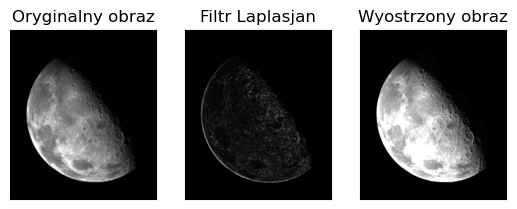

In [11]:
image_path = 'ObrazyTestowe/blurry-moon.tif'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Filtr Laplasjan
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
    
# Wyostrzony obraz
sharpened_img = cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)
    
# Wyświetlenie wyników
titles = ['Oryginalny obraz', 'Filtr Laplasjan', 'Wyostrzony obraz']
images = [img, laplacian, sharpened_img]
    
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

### c) Działanie filtrów typu „unsharp masking” i „high boost”

W tym zadaniu analizowane jest działanie dwóch technik wyostrzania obrazu: **Unsharp Masking** oraz **High-Boost Filtering**.

- **Unsharp Masking (Maskowanie nieostrości)**

To klasyczna metoda wyostrzania polegająca na odjęciu rozmytego obrazu od oryginalnego, aby uzyskać tzw. maskę wyostrzającą. Następnie dodaje się ją z powrotem do oryginału wzmocnioną odpowiednim współczynnikiem:

$$
I_{\text{unsharp}} = I + \alpha (I - I_{\text{blurred}})
$$

W kodzie operacja została zrealizowana jako ważona suma obrazu i jego rozmytej wersji: *cv2.addWeighted(img, 1.5, blurred, -0.5, 0)*

- **High-Boost Filtering**

To uogólnienie metody unsharp masking, w której stosuje się większy współczynnik wzmocnienia `α > 1`. Pozwala to na mocniejsze uwydatnienie szczegółów bez utraty ogólnego kontrastu:

$$
I_{\text{high-boost}} = \alpha \cdot I - \beta \cdot I_{\text{blurred}}
$$

Dla `α = 1` i `β = 1` filtr zachowuje się jak standardowy unsharp masking.

W obu przypadkach do uzyskania rozmytego obrazu użyto filtru Gaussowskiego (`cv2.GaussianBlur()`), który skutecznie wygładza obraz przed zastosowaniem wzmocnienia.

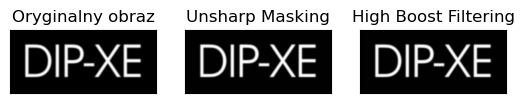

In [12]:
image_path = 'ObrazyTestowe/text-dipxe-blurred.tif'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

alpha=1.5
beta=-0.5

# Filtr Gaussowski
blurred = cv2.GaussianBlur(img, (5, 5), 0)
    
# Unsharp masking
unsharp_mask = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    
# High boost filtering
high_boost = cv2.addWeighted(img, alpha, blurred, beta, 0)
    
# Wyświetlenie wyników
titles = ['Oryginalny obraz', 'Unsharp Masking', 'High Boost Filtering']
images = [img, unsharp_mask, high_boost]
    
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()